<a href="https://colab.research.google.com/github/baorz-gab/Test_GFB_DS_team/blob/main/Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Test GFM DS Team (Ejercicio 1)

Los datos con los que trabajaremos para este ejercicio fueron obtenidos de la página de datos abiertos de [Ecobici](https://www.ecobici.cdmx.gob.mx/es/informacion-del-servicio/open-data), estos datos son de los meses de **agosto, semptiembre y octubre** del año 2011.

In [2]:
# Tratamiento de datos
import pandas as pd
import numpy as np
from datetime import datetime
# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

import warnings        
# ignorar 
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot')


In [3]:
#Cargango datos
url_agosto = "https://www.ecobici.cdmx.gob.mx/sites/default/files/data/usages/2011-08.csv" #url de los datos para el mes de agosto
url_septiembre = "https://www.ecobici.cdmx.gob.mx/sites/default/files/data/usages/2011-09.csv" #url de los datos para el mes de septiembre
url_octubre = "https://www.ecobici.cdmx.gob.mx/sites/default/files/data/usages/2011-10.csv" #url de los datos para el mes de octubre

#leemos el csv y lo guardamos en una variable
agosto = pd.read_csv(url_agosto)
septiembre = pd.read_csv(url_septiembre)
octubre = pd.read_csv(url_octubre)

#convertimos en un solo dataframe
datos = pd.concat([agosto, septiembre, octubre], ignore_index=True)
#Información-> nombre de col, tipo de dato, si hay datos faltantes
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621237 entries, 0 to 621236
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Genero_Usuario         621237 non-null  object
 1   Edad_Usuario           621237 non-null  int64 
 2   Bici                   621237 non-null  int64 
 3   Ciclo_Estacion_Retiro  621237 non-null  int64 
 4   Fecha_Retiro           621237 non-null  object
 5   Hora_Retiro            621237 non-null  object
 6   Ciclo_Estacion_Arribo  621237 non-null  int64 
 7   Fecha_Arribo           621237 non-null  object
 8   Hora_Arribo            621237 non-null  object
dtypes: int64(4), object(5)
memory usage: 42.7+ MB


In [4]:
datos.head() #visualización de como es el dataframe

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,37,250,87,2011-08-01,00:01:00.203000,85,2011-08-01,00:14:29.933000
1,M,25,640,84,2011-08-01,00:01:55.453000,69,2011-08-01,00:35:40.247000
2,M,51,418,83,2011-08-01,00:06:27.130000,54,2011-08-01,00:29:50.693000
3,M,39,1067,66,2011-08-01,00:09:06.303000,66,2011-08-01,00:17:25.013000
4,M,25,926,56,2011-08-01,00:09:25.320000,53,2011-08-01,00:18:48.593000


> Con lo anterior podemos ver que no existen datos faltantes, ademas de que podemos ver que datos son los que tenemos. Contamos con los siguientes datos:

* Genero_Usuario: Si es Masculino (M) o Femenino (F)
* Edad_Usuario: Que edad tiene el usuario
* Bici:  Número de bici que usa el usuario
* Ciclo_Estacion_Retiro: De que estación salio
* Fecha_Retiro: Que día rento la bici
* Hora_Retiro: A que hora hizo la renta de bici
* Ciclo_Estacion_Arribo: En que estación termino el viaje o recorrido del usuario
* Fecha_Arribo: Que día regreso la bici
* Hora_Arribo: A que hora finaliza su viaje

Para poder manipular mas comodamente los datos y hacer el análisis necesario, vamos a cambiar los datos de las columnas **Hora_Retiro** y **Hora_Arribo**, solo dejaremos la hora, sin minutos ni segundos. Este cambio nos ayudara a calcular mejor horarios de mayor y menos afluencia entre otras cosas.

In [5]:
datos['Hora_Retiro'] =datos.Hora_Retiro.astype('str') #transformamos primero los datos de esta columna en cadena 
datos['Hora_Retiro'] =datos.Hora_Retiro.str.slice(stop=2) #cortamos la cadena hasta el indice 2

datos['Hora_Arribo'] =datos.Hora_Arribo.astype('str') #transformamos primero los datos de esta columna en cadena
datos['Hora_Arribo'] =datos.Hora_Arribo.str.slice(stop=2) #cortamos la cadena hasta el indice 2

#Convertimos los datos de la columna en enteros
datos['Hora_Retiro'] =datos.Hora_Retiro.astype('int')
datos['Hora_Arribo'] =datos.Hora_Arribo.astype('int')

#Tambien pasamos los datos de las columnas de fecha a datetime
datos['Fecha_Retiro'] = pd.to_datetime(datos.Fecha_Retiro)
datos['Fecha_Arribo'] = pd.to_datetime(datos.Fecha_Arribo)

datos

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,37,250,87,2011-08-01,0,85,2011-08-01,0
1,M,25,640,84,2011-08-01,0,69,2011-08-01,0
2,M,51,418,83,2011-08-01,0,54,2011-08-01,0
3,M,39,1067,66,2011-08-01,0,66,2011-08-01,0
4,M,25,926,56,2011-08-01,0,53,2011-08-01,0
...,...,...,...,...,...,...,...,...,...
621232,M,30,798,88,2011-10-30,20,30,2011-10-31,3
621233,M,26,561,30,2011-10-30,23,30,2011-10-31,3
621234,M,28,358,31,2011-10-30,23,83,2011-10-31,0
621235,M,40,698,84,2011-10-30,23,77,2011-10-31,0


Sabemos que en cualquier dataframe pueden existir *outliers* o datos atípicos, en este caso los datos atípicos que más nos interesa encontrar es en las columnas de estaciones; ya que para el año 2011 solo existian 90 cicloestaciones.

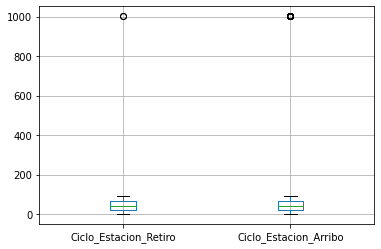

In [6]:
boxplot = datos.boxplot(column=['Ciclo_Estacion_Retiro','Ciclo_Estacion_Arribo']) #diagrama de cajas para saber si existen estaciones registradas fuera del rango

Vemos que si existen datos fuera del rango, así que vamos a quitarlos, en este caso se decidio hacer esto ya que no son tantos los datos que se salen del parametro.

In [10]:
#Delimitamos para tomar los datos que tienen como cicloestacion el numero 90 o menor
datos = datos.loc[datos['Ciclo_Estacion_Retiro'] <= 90]
datos = datos.loc[datos['Ciclo_Estacion_Arribo'] <= 90]


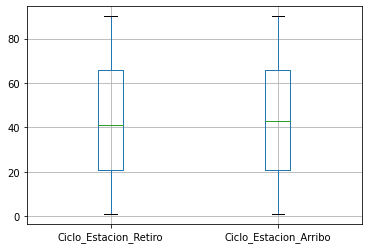

In [11]:
#varificamos que no existan mas datos fuera del limite
boxplot = datos.boxplot(column=['Ciclo_Estacion_Retiro','Ciclo_Estacion_Arribo'])

## 1. ¿En que horarios hay mayor afluencia y en qué estaciones? Da una breve descripción de por qué crees que es así

Antes de contestar a la pregunta, vamos a hacer un analísis semanal, a que hora se usa mas el servicio y en que día de la semana. Para ello vamos a tomar de la fecha que dia de la semana fue para registrar ese número de día en nuestra dataframe.

In [13]:
#Creamos nuevas columnas para los dia de la semana donde 0 = lunes, 1 = martes, ..., 6 = domingo
datos['Dia_Semana_Arribo'] = datos.Fecha_Arribo.dt.dayofweek #En que día de la semana cayo la fecha
datos['Dia_Semana_Retiro'] = datos.Fecha_Retiro.dt.dayofweek #En que día de la semana cayo la fecha

Ya que tenemos esos datos, vamos a calcular un mapa de calor donde podremos visualizar para cada dia de la semana que horarios son los mas frecuentados.

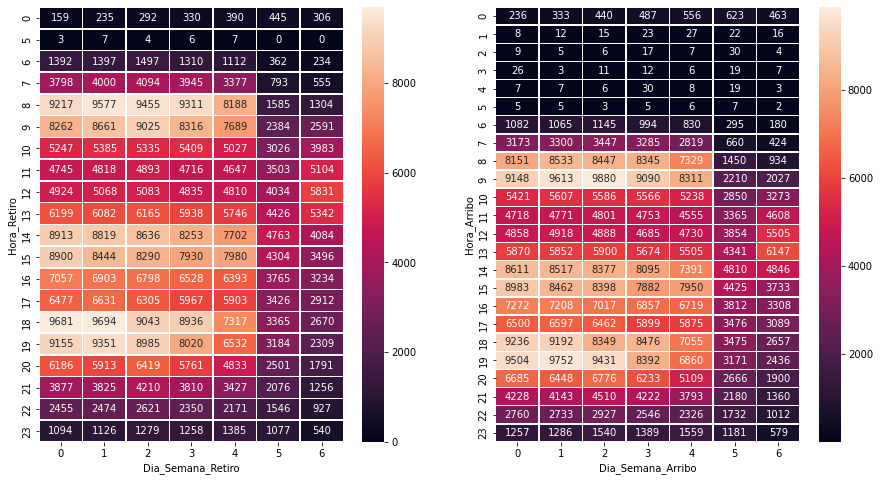

In [14]:
retiro = pd.crosstab(index=datos['Hora_Retiro'], columns=datos['Dia_Semana_Retiro']) # tabla con las frecuencias de uso: ej. para el lunes cuantos retiros hubo a las 7
arribo = pd.crosstab(index=datos['Hora_Arribo'], columns=datos['Dia_Semana_Arribo']) # tabla con las frecuencias de uso: ej. para el lunes cuantos retiros hubo a las 7
fig, ax = plt.subplots(1,2, figsize=(15,8)) #definimos tamaño de gráfica y el eje
sns.heatmap(retiro, annot=True, fmt="d", linewidths=.5, ax=ax[0]) #gráfica de calor
sns.heatmap(arribo, annot=True, fmt="d", linewidths=.5, ax=ax[1]) #gráfica de calor
fig.show() #imprimimos 

Entonces, podemos ver que los horarios mas concurridos son entre semana (de luneas a viernes) y estos horarios corresponden al horario de entrada y salida de oficina. Tambien podemos notar que los fines de semana la demanda de servicio disminuye considerablemente, el unico horario que tiene afluencia considerable es el domingo de 12 a 13 horas.

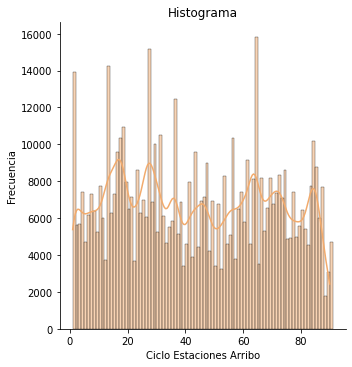

In [15]:
#vamos a calcular un histograma para ver que cicloestacion es la mas frecuentada

intervalos = range(datos.Ciclo_Estacion_Arribo.min(), datos.Ciclo_Estacion_Arribo.max() + 2) #determinamos el rango para la gráfica del eje y
sns.displot(datos.Ciclo_Estacion_Arribo, color='#F2AB6D', bins=intervalos, kde=True) #creamos el gráfico en Seaborn

#configuramos en Matplotlib
plt.ylabel('Frecuencia')
plt.xlabel('Ciclo Estaciones Arribo')
plt.title('Histograma')

plt.show()

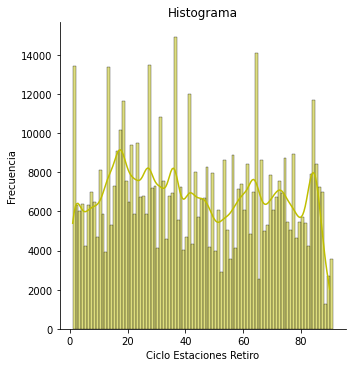

In [16]:
#Hacemos lo mismo para Ciclo_Estaciones_Retiro 
intervalos = range(datos.Ciclo_Estacion_Retiro.min(), datos.Ciclo_Estacion_Retiro.max() + 2) #determinamos el rango para la gráfica del eje y
sns.displot(datos.Ciclo_Estacion_Retiro, color="y", bins=intervalos, kde=True) #creamos el gráfico en Seaborn
#configuramos en Matplotlib
plt.ylabel('Frecuencia')
plt.xlabel('Ciclo Estaciones Retiro')
plt.title('Histograma')
plt.show()

Podemos ver que la cicloestación 64 y 36 son las mas frecuentadas, la estación 64 para tomar una bici y la 36 para dejarla. Eso no significa que estas cicloestaciones sean las que mas se usan para los horarios con mas afluencia. Para ello vamos a agrupar los datos con respecto al día de la semana y ver que dato es el que se repite mas para cada día

In [66]:
#Quitamos las fechas, genero y bici ya que esos datos no nos interesan por el momento
df = datos.iloc[:, 3:11] 
df = df.drop(['Fecha_Retiro', 'Fecha_Arribo'], axis = 1) 
#Agrupamos por dia de la semana
df.groupby('Dia_Semana_Arribo').apply(pd.DataFrame.mode)

,,Ciclo_Estacion_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Hora_Arribo,Dia_Semana_Arribo,Dia_Semana_Retiro
Dia_Semana_Arribo,,,,,,,
0,0,36,18,64,19,0,0
1,0,36,18,64,19,1,1
2,0,36,8,64,9,2,2
3,0,36,8,64,9,3,3
4,0,27,8,27,9,4,4
5,0,64,14,64,14,5,5
6,0,27,12,27,13,6,6


In [18]:
df.groupby('Dia_Semana_Retiro').apply(pd.DataFrame.mode)

,,Ciclo_Estacion_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Hora_Arribo,Dia_Semana_Arribo,Dia_Semana_Retiro
Dia_Semana_Retiro,,,,,,,
0,0,36,18,64,19,0,0
1,0,36,18,64,19,1,1
2,0,36,8,64,9,2,2
3,0,36,8,64,9,3,3
4,0,27,8,27,9,4,4
5,0,64,14,64,14,5,5
6,0,27,12,27,13,6,6


Con lo anterior podemos concluir que los horarios con mayor afluencia son: 
* Lunes - Viernes: 8 - 9, 14 - 15 y 18 - 19 en las estaciones 36,64 
* Viernes: 8 - 9 la en la estacion 27
* Domingos: 12 - 14  en las estación 27

## 2. A partir de un análisis temporal:
* ¿En qué estaciones puedes observar una tendencia de uso a la alta?
* ¿Puedes categorizar las estaciones con base en su tendencia de uso?
* Demuestra tus conclusiones gráficamente

Vamos a graficar para cada día que estación es la que mas se frecuenta.

In [41]:
df_fechas = datos.iloc[:, 3:5] #obtenemos las columnas Fecha_Retiro y Ciclo_Estacion_Retiro
#Agrupamos con respecto a fechas con frecuencia, en el agrupamiento se reporta la moda para la columna Ciclo_Estacion_Retiro
df_fechas = df_fechas.groupby(pd.Grouper(key = 'Fecha_Retiro', freq = 'D')).apply(pd.DataFrame.mode)

df_fechas2 = datos.iloc[:, 6:8]  #obtenemos las columnas Fecha_Retiro y Ciclo_Estacion_Arribo
#Agrupamos con respecto a fechas con frecuencia, en el agrupamiento se reporta la moda para la columna Ciclo_Estacion_Arribo
df_fechas2 = df_fechas2.groupby(pd.Grouper(key = 'Fecha_Arribo', freq = 'D')).apply(pd.DataFrame.mode)

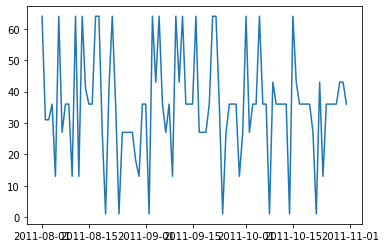

In [37]:
#Graficamos los datos obtenidos por el agrupamiento
plt.plot(df_fechas.Fecha_Retiro, df_fechas.Ciclo_Estacion_Retiro)
plt.show()

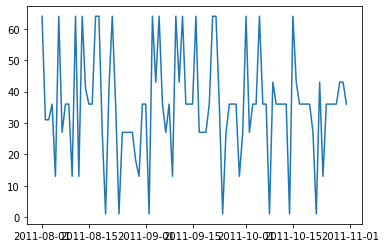

In [38]:
#Graficamos los datos obtenidos por el agrupamiento
plt.plot(df_fechas.Fecha_Retiro, df_fechas.Ciclo_Estacion_Retiro)
plt.show()

Como ya habiamos dicho en anteriormente, las estaciones 64, 36 y 27 son las mas usadas, no solo eso, tienen tendencia de uso a la alta. Aunque, gracias a este ultimo analisis tambien podemos decir que las **estaciones 43, 31 y 13** tienen tendencia de uso a la alta.

Otra cosa que podemos confirmas es que las estaciones mas usadas son estaciones ubicadas en zona de oficinas (Reforma, Chapultepec), mientras que algunas estaciones como la 43 esta cerca de la Alameda central por lo que podemos decir que esos usos son para ir a "dar un paseo" mientras que las demas rutas son para ir al trabajo y de regreso.

## 3. Por cada estación de Ecobici, identifica cómo están correlacionadas las entradas-salidas entre las otras estaciones

Para identificar la correlación vamos a graficar un *heatmap* con respecto a **Ciclo_Estacion_Retiro** y **Ciclo_Estacion_Arribo**

In [44]:
estaciones = pd.crosstab(index=datos['Ciclo_Estacion_Retiro'], columns=datos['Ciclo_Estacion_Arribo']) # tabla con frecuencias ej: Cuantas veces se sale de la estacion 1 y se llega a la estacion 2


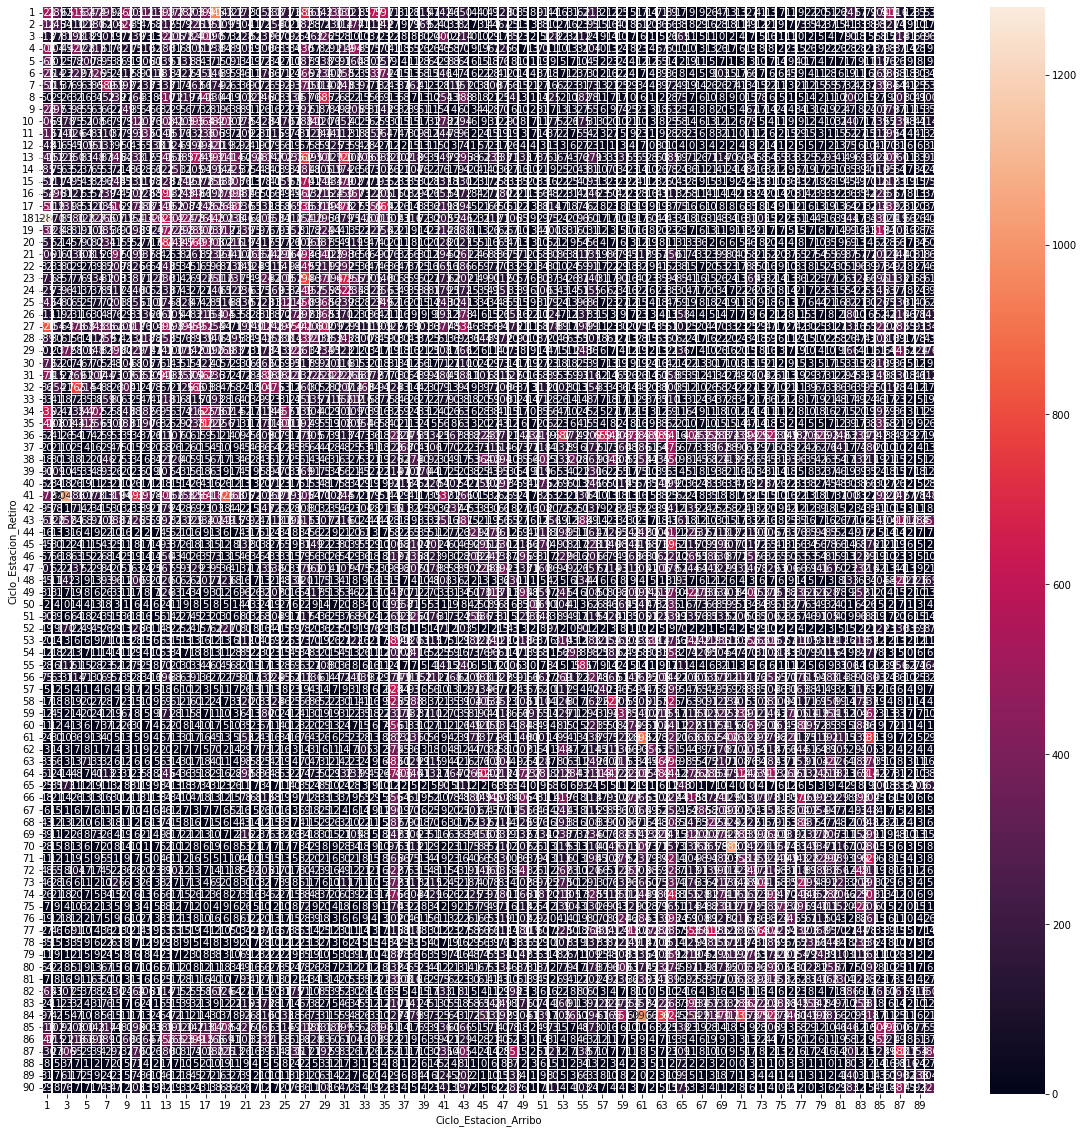

In [45]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(estaciones, annot=True, fmt="d", linewidths=.5)
fig.show()

Podemos ver que las estaciones que más correlacion tienen con respecto a su entrada y salida son 1-35

## 4. Usa un método de aprendizaje no supervisado para encontrar perfiles de uso de las estaciones. Lo que debes de hacer es categorizar a las estaciones en diferentes grupos a partir de su comportamiento de entradas y salidas. Explica el método que usaste y por qué. De los grupos que encontraste describe las características que puedes inferir de estos a partir de lo descubierto en el inciso anterior


Vamos a hacer uso de un cluster, especificamente vamos a usar K-means, el motivo es que k-means es un metodo de clasificación y lo que queremos es el agruoamiento de elementos.

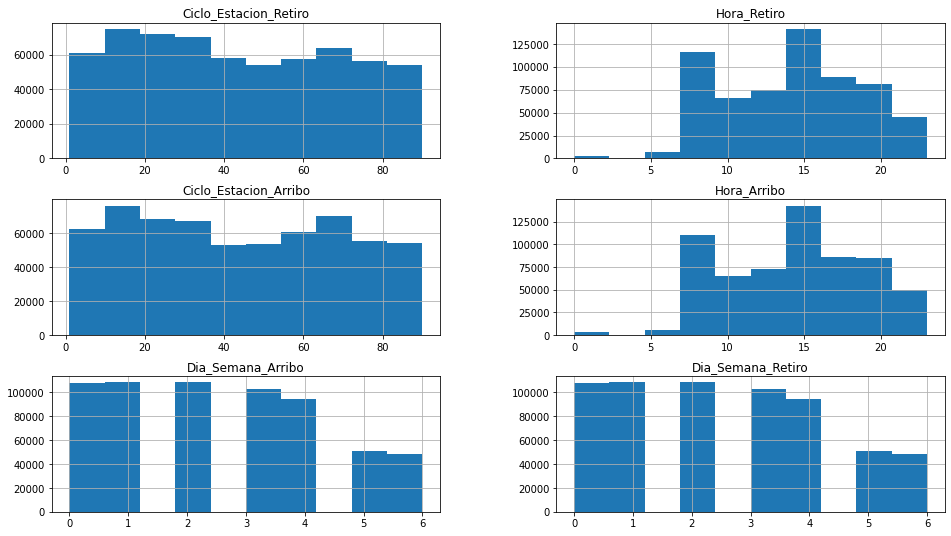

In [55]:
#Graficamos el histograma de cada columna
plt.rcParams['figure.figsize'] = (16, 9)
df.hist()
plt.show()

In [67]:
#Escalamos nuestros datos
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler() #metodo de transformación
X = ms.fit_transform(df)

No sabemos cual es el número optimo de cluster para nuestros datos, para ellos usamos el metodo del codo o *elbow method*. El método del codo utiliza la distancia media de las observaciones a su centroide. Es decir, se fija en las distancias intra-cluster.

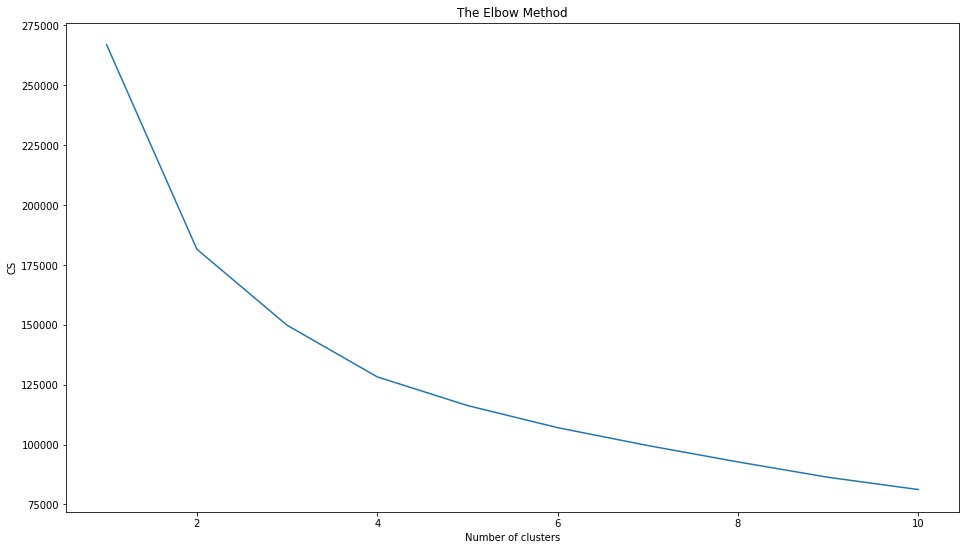

In [68]:
from sklearn.cluster import KMeans
cs = [] 
#funcion mara metodo del codo
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

Con base a lo anterior podemos ver que el numero optimo de clusters esta entre 2 y 3. Tomaremos 3

In [69]:
from sklearn.cluster import KMeans
#Funcion para hacer nuestro agrupamiento mediante KMeans con numero de clusters = 3
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# comprobamos cuántas de las muestras se etiquetaron correctamente
labels = kmeans.labels_
#Unimos nuestro resultado a los datos 
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,Ciclo_Estacion_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Hora_Arribo,Dia_Semana_Arribo,Dia_Semana_Retiro,cluster
0,87.0,0.0,85.0,0.0,0.0,0.0,0.0
1,84.0,0.0,69.0,0.0,0.0,0.0,0.0
2,83.0,0.0,54.0,0.0,0.0,0.0,0.0
3,66.0,0.0,66.0,0.0,0.0,0.0,0.0
4,56.0,0.0,53.0,0.0,0.0,0.0,0.0


Vamos a interpretar nuestros cluesters

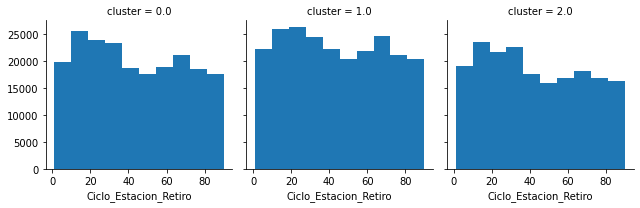

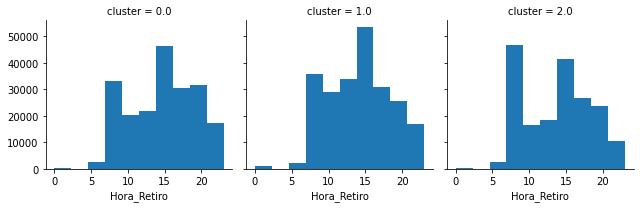

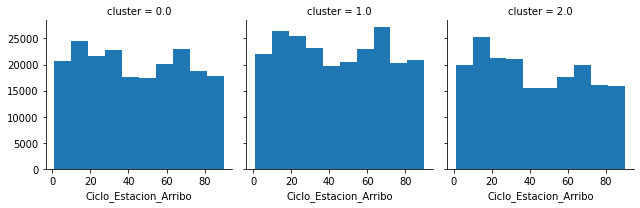

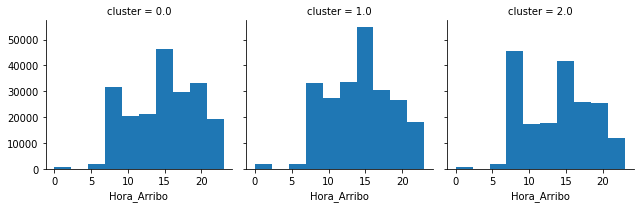

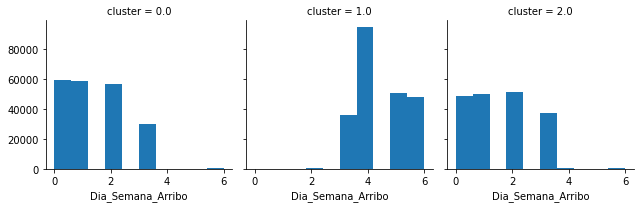

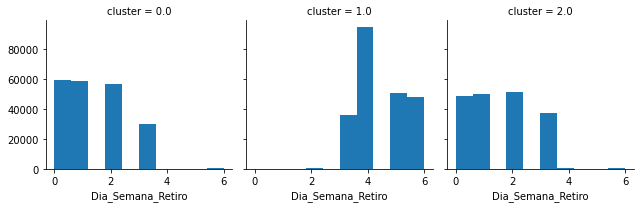

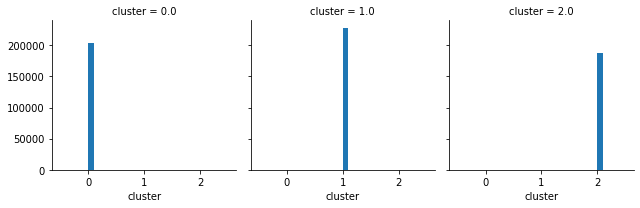

In [70]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

* Cluster 0: Personas que usan el servicio en la mañana y tarde entre semana 
* Cluster 1 : Personas que usan el servicio los fines de semana en la tarde 
* Cluster 2: Peronsas que usan el servicio en la mañana y tarde entre semana 

En el cluster 0 y 2 podemos ver que se agruparon las personas que mayormente usan las estaciones 36,64 y 17 que son las que habiamos mencionado anteriormente como las estaciones centricas en zona laboral.

El cluster 1 agrupa a las personas que usan el servicio fines de semana y mayormente en la tarde.

Para poder visualizar en una grafica como quedaron distribuidos los cluster, tenemos que bajar la dimencionalidad, en este caso haremos uso de un analisis de componentes principales (PCA).

In [64]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
#Definimos cuantos PCA queremos obtener y en este caso son 2 ya que queremos tener un resultado 2D
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X)  
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head(2)

,P1,P2
0,-0.541891,0.593249
1,-0.551349,0.441326


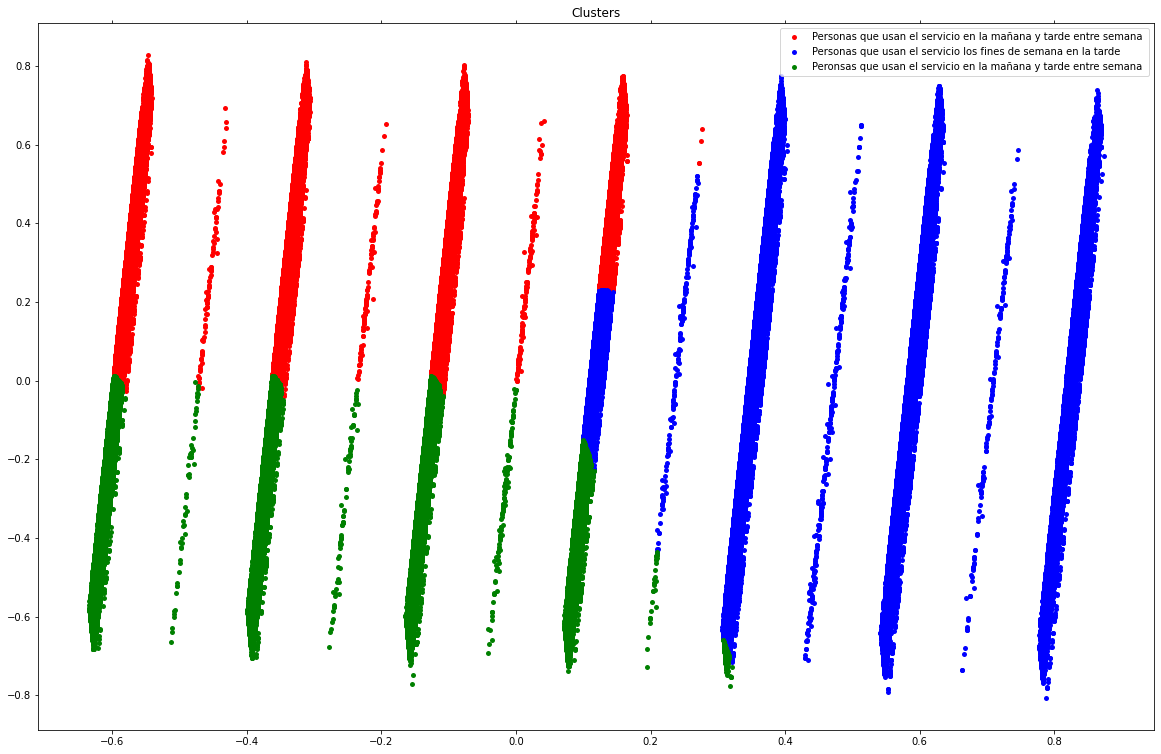

In [72]:
x, y = X_principal['P1'], X_principal['P2'] #definimos variables para cada columna del PCA
#Grafica del PCA con respecto a los cluster
colors = {0: 'red',
          1: 'blue',
          2: 'green'}

names = {0: 'Personas que usan el servicio en la mañana y tarde entre semana', 
         1: 'Personas que usan el servicio los fines de semana en la tarde', 
         2: 'Peronsas que usan el servicio en la mañana y tarde entre semana ',}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Clusters")
plt.show()